In [2]:
!apt-get install python3-opencv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-opencv is already the newest version (4.6.0+dfsg-12).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [109]:
import cv2
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
from scipy import ndimage

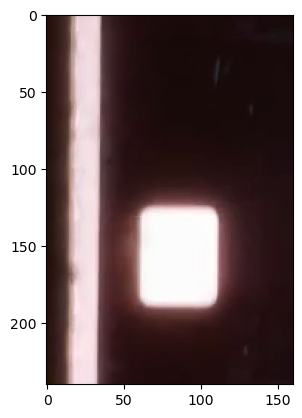

In [185]:
#image = cv2.imread('/frames/20240326_640_480/capture/00000000_22000.png')
image = cv2.imread('/frames/frames_for_cam_sprocket/0089.png')
y,x = image.shape[:2]
image = image[int(y/4):y-int(y/4),0:int(x/4)]
plt.imshow(image)

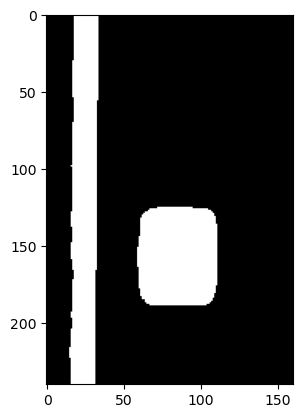

In [194]:
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image3 = np.asarray(image2, dtype=np.uint8)
image3 = ndimage.grey_erosion(image3, size=(5,5))
_, image3 = cv2.threshold(image3, 100, 255, cv2.THRESH_BINARY)
plt.imshow(image3,cmap='gray')



In [196]:
#matrix = (3,7)
#image4 = cv2.GaussianBlur(image3, matrix, 0)
#plt.imshow(image4,cmap='gray')
#print(image4)

In [201]:
# Apply a threshold to the grayscale image to find the white square
#_, thresh = cv2.threshold(image4, 100, 255, cv2.THRESH_BINARY)
#plt.imshow(thresh,cmap='gray')
def whtest(contour):
    (x,y,w,h) = cv2.boundingRect(contour)
    return (50 < w < 60) & (60 < h < 70)
    

# Find the contours in the thresholded image
contours, _ = cv2.findContours(image3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = filter(whtest, contours)
contour = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)[0]

for c in contours:
    print("Contour Area: " + str(cv2.contourArea(c)))
    x, y, width, height = cv2.boundingRect(c)
    print(f'x {x} y {y} width {width} height {height}')

# Loop through the contours and find the largest one, which should be the white square
#largest_area = 0
#largest_contour = None
#for contour in contours:
#    area = cv2.contourArea(contour)
#    #print(area)
#    #print(contour)
#    if area > largest_area:
#        largest_area = area
#        largest_contour = contour

# Get the bounding box of the largest contour
x, y, width, height = cv2.boundingRect(contour)

# Print the size and location of the white square
print(f"White square size: {width}x{height} pixels")
print(f"White square location: ({x}, {y})")

Contour Area: 3027.0
x 59 y 125 width 52 height 64
Contour Area: 3584.0
x 15 y 0 width 19 height 240
White square size: 19x240 pixels
White square location: (15, 0)


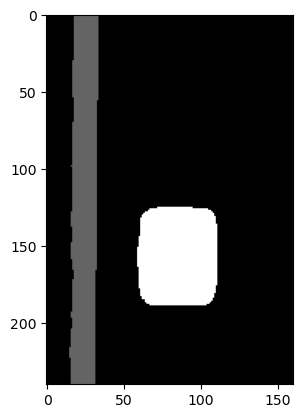

In [198]:
cv2.drawContours(image3, [contour], -1, (100,100,100), thickness=cv2.FILLED)
plt.imshow(image3,cmap='gray')

In [ ]:
area = cv2.contourArea(contour)
rect = cv2.minAreaRect(area)
